
#LOAN CLASSIFICATION


## Problem statement

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [197]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
%matplotlib inline
import time

## Data exploration

In [198]:
start = time.time()

loan_train = pd.read_csv('/content/loan-train.csv', low_memory = False)

stop = time.time()
duration = stop-start
print('It took {:.2f} seconds to read the entire csv file.'.format(duration))

loan_train.head()

It took 0.01 seconds to read the entire csv file.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [199]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [200]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [201]:
missing_data=loan_train.isnull()
missing_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values. 

In [202]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print('')

Loan_ID
False    614
Name: Loan_ID, dtype: int64

Gender
False    601
True      13
Name: Gender, dtype: int64

Married
False    611
True       3
Name: Married, dtype: int64

Dependents
False    599
True      15
Name: Dependents, dtype: int64

Education
False    614
Name: Education, dtype: int64

Self_Employed
False    582
True      32
Name: Self_Employed, dtype: int64

ApplicantIncome
False    614
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
False    614
Name: CoapplicantIncome, dtype: int64

LoanAmount
False    592
True      22
Name: LoanAmount, dtype: int64

Loan_Amount_Term
False    600
True      14
Name: Loan_Amount_Term, dtype: int64

Credit_History
False    564
True      50
Name: Credit_History, dtype: int64

Property_Area
False    614
Name: Property_Area, dtype: int64

Loan_Status
False    614
Name: Loan_Status, dtype: int64



As we can see the data has some missing values so we need to decide how wee would deal with them.

In [203]:
# Analyzing the missing value in each columns
df_null = pd.DataFrame({'Count': loan_train.isnull().sum(), 'Percent': round(100*loan_train.isnull().sum()/len(loan_train),2)})
df_null[df_null['Count'] != 0] 

,Count,Percent
Gender,13,2.12
Married,3,0.49
Dependents,15,2.44
Self_Employed,32,5.21
LoanAmount,22,3.58
Loan_Amount_Term,14,2.28
Credit_History,50,8.14


## Data visualization

Loan Status


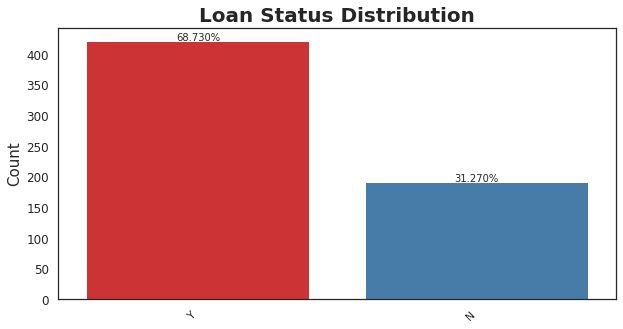

In [204]:
plt.figure(figsize = (10,5))
plot1 = sns.barplot(loan_train['Loan_Status'].value_counts().index, loan_train['Loan_Status'].value_counts(), palette = 'Set1')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.yticks(fontsize = 12)
plt.title("Loan Status Distribution", fontsize = 20, weight='bold')
plt.ylabel("Count", fontsize = 15)

total = len(loan_train)
sizes = []
for p in plot1.patches:
    height = p.get_height()
    sizes.append(height)
    plot1.text(p.get_x() + p.get_width()/2.,
            height ,
            '{:1.3f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 10) 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


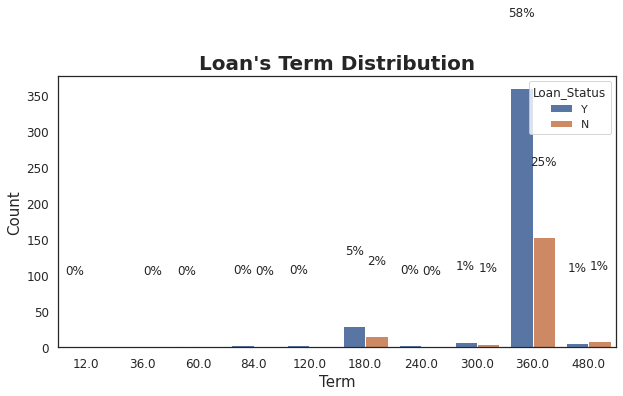

In [205]:
plt.figure(figsize=(10, 5))
plot2 = sns.countplot(loan_train['Loan_Amount_Term'], hue = loan_train['Loan_Status'])
plt.title("Loan's Term Distribution", fontsize = 20, weight='bold')
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Term", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

total = len(loan_train)
sizes = []
for p in plot2.patches:
    height = p.get_height()
    sizes.append(height)
    plot2.text(p.get_x() + p.get_width()/2.,
            height + 100,
            '{:1.0f}%'.format(height/total*100),
            ha = "center", 
            fontsize = 12) 

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
        0.009]), <a list of 10 Text major ticklabel objects>)

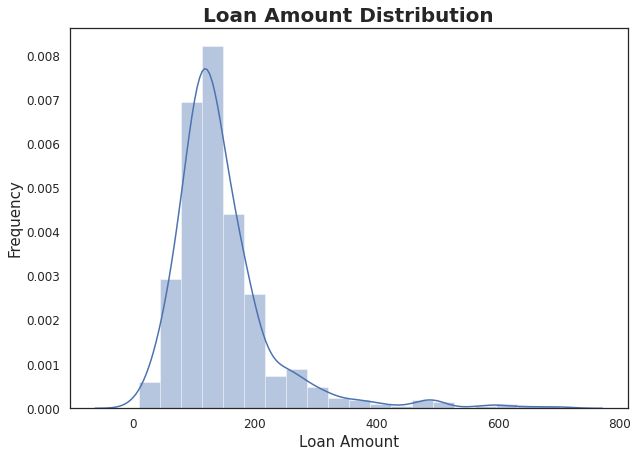

In [206]:
plt.figure(figsize = (10,7))
sns.distplot(loan_train['LoanAmount'], bins=20)
plt.title('Loan Amount Distribution', fontsize = 20, weight='bold')
plt.xlabel('Loan Amount', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

  ## Data preparation 

In [207]:
# Dropping rows with null values
df_clean = loan_train.dropna(axis = 0)

In [208]:
print('Number of dropped rows: {} rows'.format(len(loan_train)-len(df_clean)))

Number of dropped rows: 134 rows


In [209]:
# The next step is to transform categorical target variable into integer
df_clean['Loan_Status'] = df_clean['Loan_Status'].replace({'Y' : 1})
df_clean['Loan_Status'] = df_clean['Loan_Status'].replace({'N' : 0})
df_clean['Loan_Status'].unique()

array([0, 1])

In [210]:
df_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [211]:
df_clean1=df_clean[['Gender','Married','Education','Dependents','ApplicantIncome','Self_Employed','LoanAmount','Loan_Amount_Term','Property_Area','Loan_Status']]

In [212]:
df_clean1

,Gender,Married,Education,Dependents,ApplicantIncome,Self_Employed,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,Male,Yes,Graduate,1,4583,No,128.0,360.0,Rural,0
2,Male,Yes,Graduate,0,3000,Yes,66.0,360.0,Urban,1
3,Male,Yes,Not Graduate,0,2583,No,120.0,360.0,Urban,1
4,Male,No,Graduate,0,6000,No,141.0,360.0,Urban,1
5,Male,Yes,Graduate,2,5417,Yes,267.0,360.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,0,2900,No,71.0,360.0,Rural,1
610,Male,Yes,Graduate,3+,4106,No,40.0,180.0,Rural,1
611,Male,Yes,Graduate,1,8072,No,253.0,360.0,Urban,1
612,Male,Yes,Graduate,2,7583,No,187.0,360.0,Urban,1


In [213]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_clean1['Gender'] = label.fit_transform(df_clean1['Gender'])
df_clean1['Married'] = label.fit_transform(df_clean1['Married'])
df_clean1['Education'] = label.fit_transform(df_clean1['Education'])
df_clean1['Self_Employed'] = label.fit_transform(df_clean1['Self_Employed'])


In [214]:
df_clean1

,Gender,Married,Education,Dependents,ApplicantIncome,Self_Employed,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,1,1,0,1,4583,0,128.0,360.0,Rural,0
2,1,1,0,0,3000,1,66.0,360.0,Urban,1
3,1,1,1,0,2583,0,120.0,360.0,Urban,1
4,1,0,0,0,6000,0,141.0,360.0,Urban,1
5,1,1,0,2,5417,1,267.0,360.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0,71.0,360.0,Rural,1
610,1,1,0,3+,4106,0,40.0,180.0,Rural,1
611,1,1,0,1,8072,0,253.0,360.0,Urban,1
612,1,1,0,2,7583,0,187.0,360.0,Urban,1


In [215]:
x= df_clean1.drop(['Loan_Status'], axis=1)
y= df_clean1['Loan_Status']

In [216]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np 

coltrans = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [3,7,8])],      # 0,3,5 refers to the column indexes that need to be transformed      
    remainder = 'passthrough'                               
)                                                         

x = np.array(coltrans.fit_transform(x))

In [217]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(
    x,
    y,
    test_size = .2
)

## Model selection

In [218]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

model = RandomForestClassifier()
model.fit(xtr, ytr)

stop = time.time()
duration = stop-start
print('The training took {:.2f} seconds.'.format(duration))

The training took 0.16 seconds.


In [219]:
print('accuracy is:',round(model.score(xts, yts) * 100, 2), '%')

accuracy is: 63.54 %


In [223]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

classifier= KNeighborsClassifier(n_neighbors=1)
classifier.fit(xtr,ytr)

y_pred=classifier.predict(xts)
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', round(accuracy_score(yts,y_pred)*100,2),'%')

accuracy is 63.54 %


In [224]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(xtr, ytr)

y_pred = classifier.predict(xts)

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',round(accuracy_score(y_pred,yts)*100,2),'%')

accuracy is 66.67 %


In [225]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(xtr, ytr)

y_pred = classifier.predict(xts)

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',round(accuracy_score(y_pred,yts)*100,2),'%')

accuracy is 60.42 %


In [227]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(xtr, ytr)

y_pred = classifier.predict(xts)

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',round(accuracy_score(y_pred,yts)*100,2),'%')

accuracy is 65.62 %


## N.B. The majority of this notebook is inspired from Anand Venkataraman's notebook on Kaggle